In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd  # Librería para manipulación y análisis de datos
import matplotlib.pyplot as plt  # Librería para crear visualizaciones
import seaborn as sns  # Librería para visualizaciones estadísticas más avanzadas
import warnings  # Módulo para manejar advertencias
warnings.filterwarnings("ignore") # Esta línea evita que se muestren advertencias durante la ejecución del código
# Esta sección carga múltiples archivos CSV de un dataset de Fórmula 1
# Cada línea usa pd.read_csv() para leer un archivo CSV específico
# Los archivos parecen cubrir diferentes aspectos del campeonato de Fórmula 1 desde 1950 hasta 2024
constructor_performance = pd.read_csv('./constructor_results.csv')
constructor_rankings = pd.read_csv('./constructor_standings.csv')
driver_details = pd.read_csv('./drivers.csv')
driver_rankings = pd.read_csv('./driver_standings.csv')
lap_timings = pd.read_csv('./lap_times.csv')
pit_stop_records = pd.read_csv('./pit_stops.csv')
qualifying_results = pd.read_csv('./qualifying.csv')
race_results = pd.read_csv('./results.csv')
race_schedule = pd.read_csv('./races.csv')
race_status = pd.read_csv('./status.csv')
season_summaries = pd.read_csv('./seasons.csv')
sprint_race_results = pd.read_csv('./sprint_results.csv')
team_details = pd.read_csv('./constructors.csv')
track_information = pd.read_csv('./circuits.csv')

In [4]:
datasets = {
    # Creamos un diccionario donde:
    # - Las claves son nombres descriptivos de los datasets
    # - Los valores son los DataFrames de pandas que cargaste anteriormente
    'Constructor Performance': constructor_performance,
    'Constructor Rankings': constructor_rankings,
    'Driver Details': driver_details,
    'Driver Rankings': driver_rankings,
    'Lap Timings': lap_timings,
    'Pit Stop Records': pit_stop_records,
    'Qualifying Results': qualifying_results,
    'Race Results': race_results,
    'Race Schedule': race_schedule,
    'Race Status': race_status,
    'Season Summaries': season_summaries,
    'Sprint Race Results': sprint_race_results,
    'Team Details': team_details,
    'Track Information': track_information
}

for name, df in datasets.items():
    # Iteramos a través de cada dataset en el diccionario
    # 'name' será el nombre descriptivo (ej. 'Constructor Performance')
    # 'df' será el DataFrame correspondiente
    print(f"Dataset: {name}") # mprime el nombre del dataset actual
    print(df.head()) # Muestra las primeras 5 filas del dataset
    print(df.info()) # Proporciona un resumen de la información del DataFrame
    print(df.describe()) # Genera estadísticas descriptivas para columnas numéricas
    print(df.isnull().sum()) # Cuenta el número de valores nulos en cada columna
    print("\n")

Dataset: Constructor Performance
   constructorResultsId  raceId  constructorId  points status
0                     1      18              1    14.0     \N
1                     2      18              2     8.0     \N
2                     3      18              3     9.0     \N
3                     4      18              4     5.0     \N
4                     5      18              5     2.0     \N
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12505 entries, 0 to 12504
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructorResultsId  12505 non-null  int64  
 1   raceId                12505 non-null  int64  
 2   constructorId         12505 non-null  int64  
 3   points                12505 non-null  float64
 4   status                12505 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 488.6+ KB
None
       constructorResultsId        raceId  constructorId     

In [5]:
qualifying_results['q2'] = qualifying_results['q2'].fillna(method='ffill') # 'ffill' -> Rellena los valores nulos con el último valor válido disponible
qualifying_results['q3'] = qualifying_results['q3'].fillna(method='ffill') # [1:23.456, NaN, NaN, 1:25.789, NaN] -> [1:23.456, 1:23.456, 1:23.456, 1:25.789, 1:25.789]

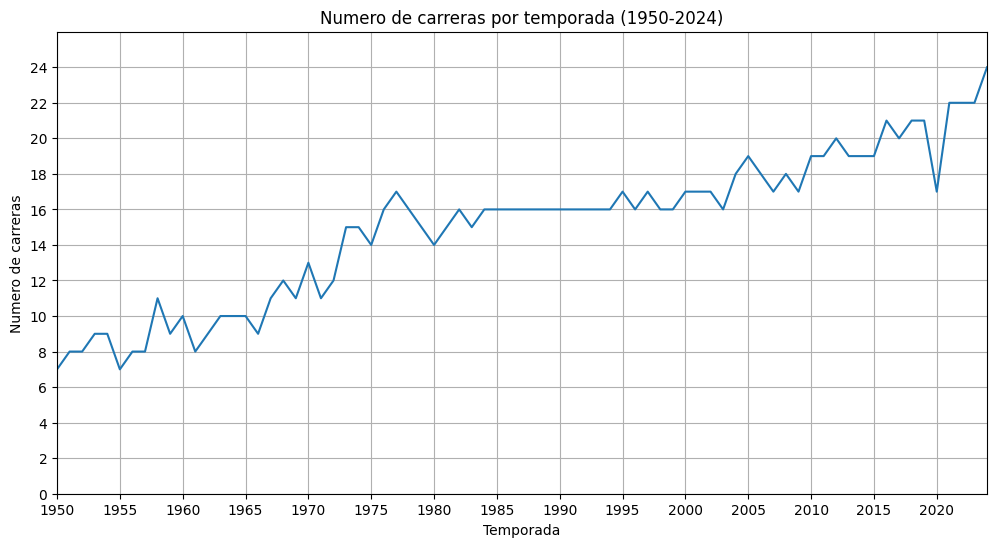

In [7]:
races_per_season = race_schedule.groupby('year').size() # Agrupamos los datos del dataset de calendario de carreras por año
plt.figure(figsize=(12, 6))
sns.lineplot(x=races_per_season.index, y=races_per_season.values) # Usamos seaborn (sns) para crear un gráfico de líneas
# Ajustamos el rango y las marcas del eje x
plt.xlim(1950, 2024)
plt.xticks(range(1950, 2025, 5))
# Ajustamos el rango y las marcas del eje y
plt.ylim(0, max(races_per_season.values) + 2)
plt.yticks(range(0, max(races_per_season.values) + 2, 2))
plt.title('Numero de carreras por temporada (1950-2024)')
plt.xlabel('Temporada')
plt.ylabel('Numero de carreras')
plt.grid(True) # Añade líneas de cuadrícula
plt.show()

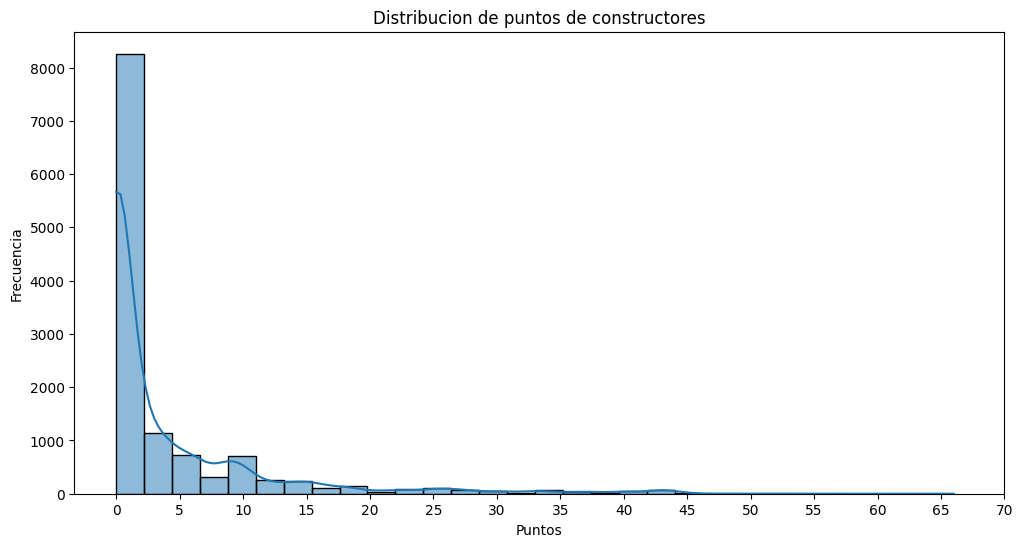

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(constructor_performance['points'], bins=30, kde=True) # bins=30: Divide los datos en 30 intervalos o categorías - kde=True: Añade una línea de Estimación de Densidad Kernel
# Ajusta las marcas del eje x
plt.xticks(range(0, int(constructor_performance['points'].max()) + 5, 5))  # Marcas de 5 en 5
plt.title('Distribucion de puntos de constructores')
plt.xlabel('Puntos')
plt.ylabel('Frecuencia')
plt.show()


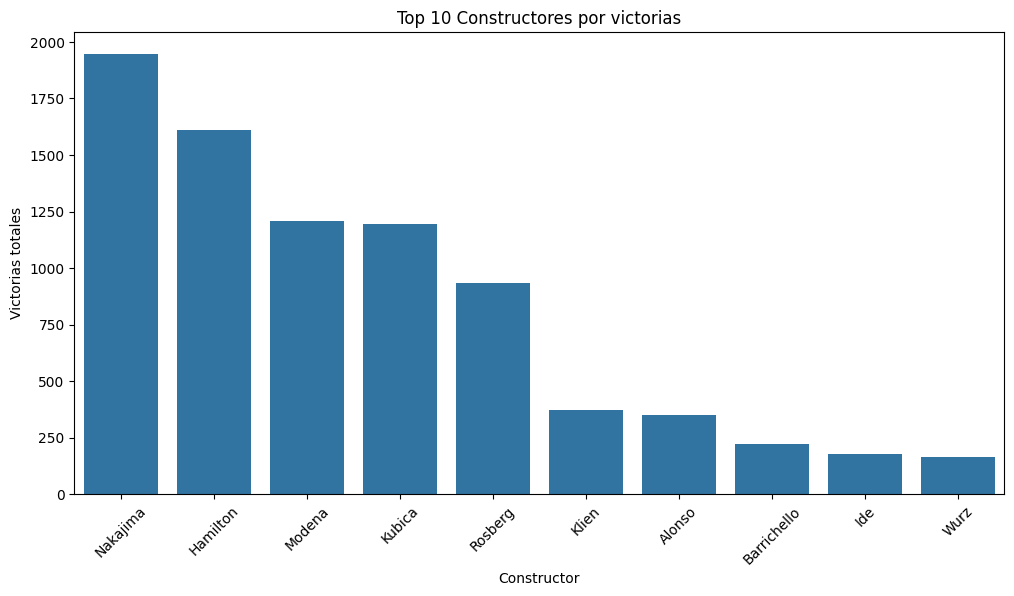

In [13]:
# groupby('constructorId'): Agrupa los datos por ID de constructor
# .agg({'wins': 'sum'}): Suma las victorias para cada constructor
# .sort_values(by='wins', ascending=False): Ordena de mayor a menor número de victorias
# .head(10): Selecciona los 10 primeros (más ganadores)
top_constructors = constructor_rankings.groupby('constructorId').agg({'wins': 'sum'}).sort_values(by='wins', ascending=False).head(10)
# Realiza un merge (unión) con los detalles de los pilotos
# how='left': Mantiene todos los registros del dataset de constructores
# left_on='constructorId': Une por ID de constructor
# right_on='driverId': Se une con el ID de piloto
top_constructors = top_constructors.merge(driver_details[['driverId', 'surname']], how='left', left_on='constructorId', right_on='driverId')
plt.figure(figsize=(12, 6))
sns.barplot(x='surname', y='wins', data=top_constructors)
plt.title('Top 10 Constructores por victorias')
plt.xlabel('Constructor')
plt.ylabel('Victorias totales')
plt.xticks(rotation=45)
plt.show()

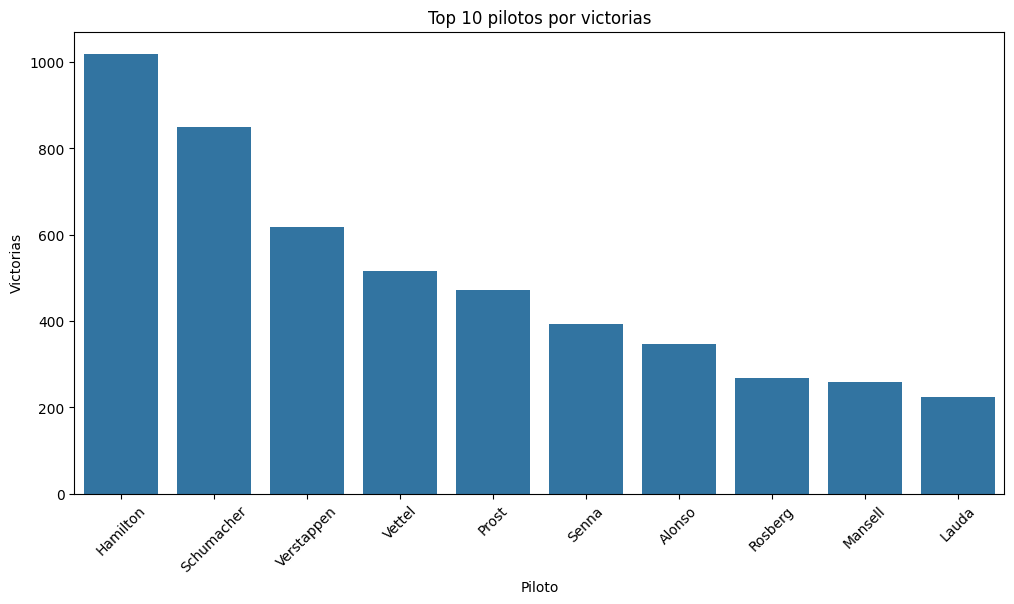

In [14]:
top_drivers = driver_rankings.groupby('driverId').agg({'wins': 'sum'}).sort_values(by='wins', ascending=False).head(10)
top_drivers = top_drivers.merge(driver_details[['driverId', 'surname']], how='left', on='driverId')
plt.figure(figsize=(12, 6))
sns.barplot(x='surname', y='wins', data=top_drivers)
plt.title('Top 10 pilotos por victorias')
plt.xlabel('Piloto')
plt.ylabel('Victorias')
plt.xticks(rotation=45)
plt.show()

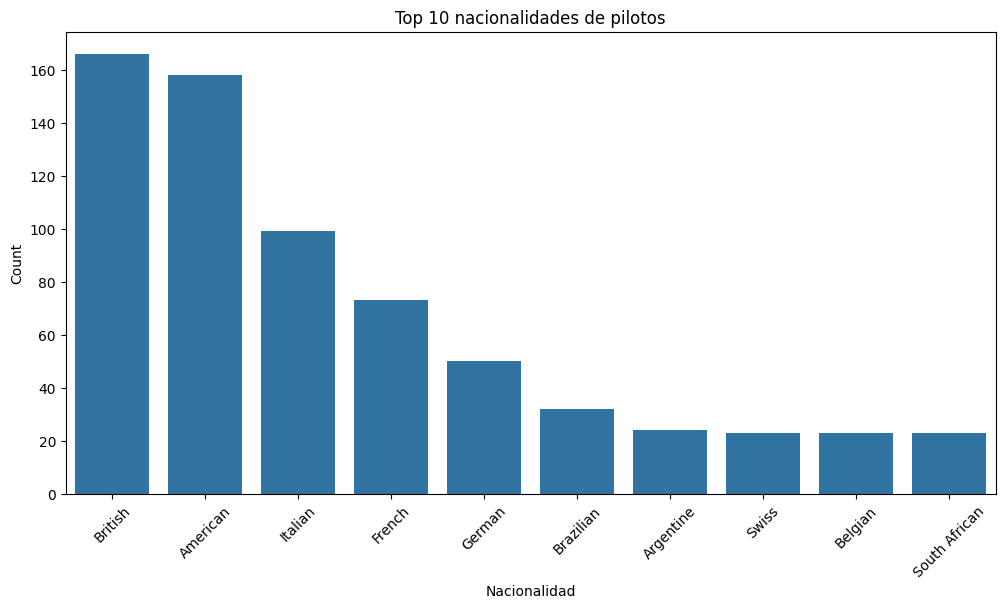

In [16]:
driver_nationality = driver_details['nationality'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=driver_nationality.index, y=driver_nationality.values)
plt.title('Top 10 nacionalidades de pilotos')
plt.xlabel('Nacionalidad')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [17]:
lap_times_by_driver = lap_timings.groupby(['driverId', 'raceId'])['milliseconds'].mean().reset_index()
# groupby(['driverId', 'raceId']): Agrupa los datos por ID de piloto y ID de carrera
# ['milliseconds'].mean(): Calcula el tiempo medio de vuelta en milisegundos para cada combinación de piloto y carrera
# .reset_index(): Convierte el resultado de la agregación de nuevo a un DataFrame plano
lap_times_by_driver.columns = ['driverId', 'raceId', 'average_lap_time']

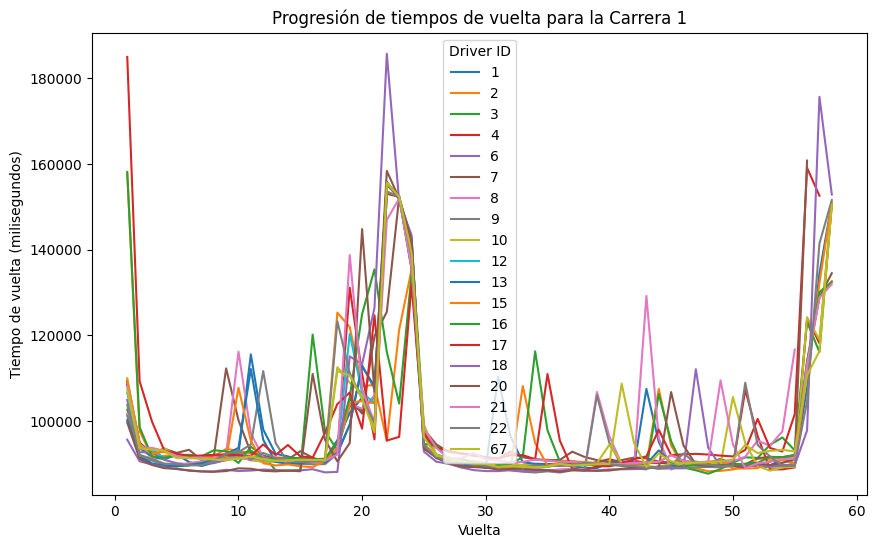

In [19]:
specific_race_lap_times = lap_timings[lap_timings['raceId'] == 1] # Selecciona solo los datos de la carrera con ID 1
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=specific_race_lap_times, 
    x='lap', 
    y='milliseconds', 
    hue='driverId', 
    palette='tab10'  
)
plt.title('Progresión de tiempos de vuelta para la Carrera 1')
plt.xlabel('Vuelta')
plt.ylabel('Tiempo de vuelta (milisegundos)')
plt.legend(title='Driver ID')
plt.show()

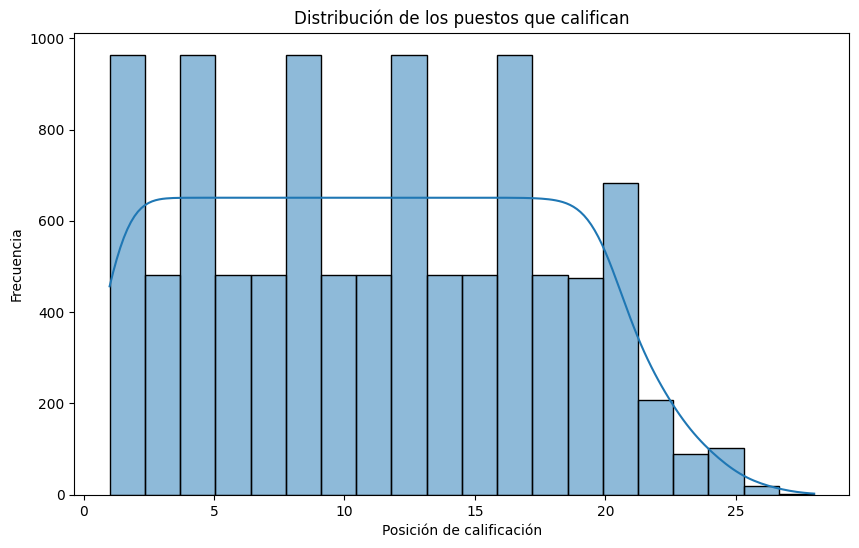

In [21]:
plt.figure(figsize=(10, 6))
# qualifying_results['position']: Selecciona la columna de posiciones del dataset de resultados de clasificación
sns.histplot(qualifying_results['position'], bins=20, kde=True)
plt.title('Distribución de los puestos que califican')
plt.xlabel('Posición de calificación')
plt.ylabel('Frecuencia')
plt.show()

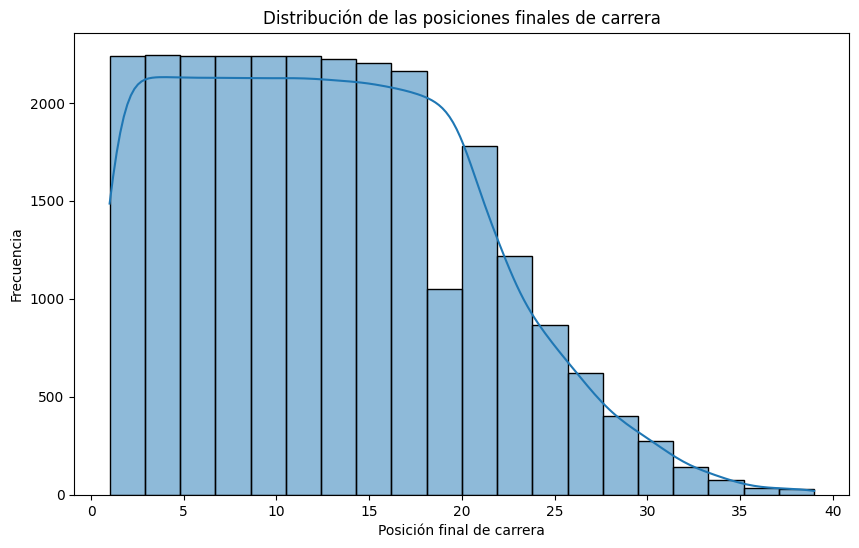

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(race_results['positionOrder'], bins=20, kde=True)
plt.title('Distribución de las posiciones finales de carrera')
plt.xlabel('Posición final de carrera')
plt.ylabel('Frecuencia')
plt.show()

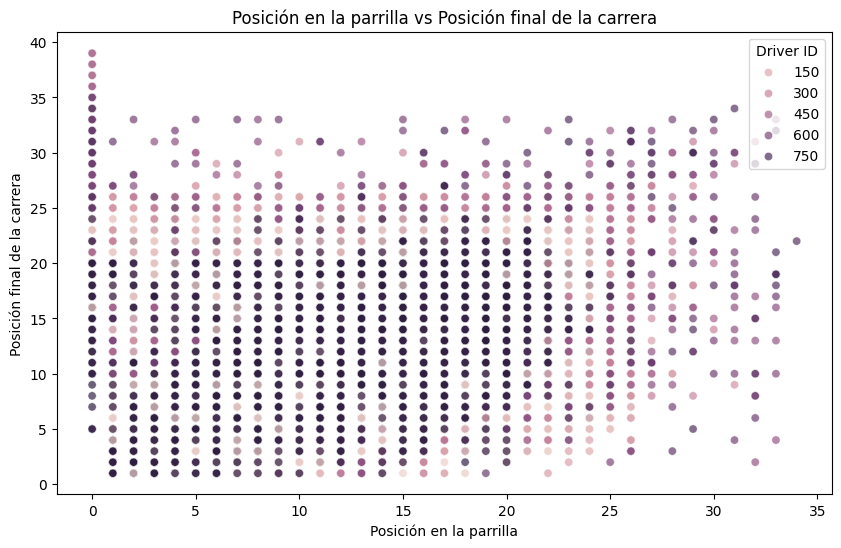

In [23]:
points_by_driver = race_results.groupby('driverId')['points'].sum().reset_index()
# groupby('driverId'): Agrupa los resultados de carreras por ID de piloto
# ['points'].sum(): Suma los puntos de todos los resultados para cada piloto
# reset_index(): Convierte el resultado a un DataFrame con columnas 'driverId' y 'points'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=race_results, x='grid', y='positionOrder', hue='driverId', alpha=0.7) # x->Posición de salida (parrilla), y->Posición final en la carrera, hue->Colorea los puntos según el ID del piloto 
plt.title('Posición en la parrilla vs Posición final de la carrera')
plt.xlabel('Posición en la parrilla')
plt.ylabel('Posición final de la carrera')
plt.legend(title='Driver ID')
plt.show()

In [7]:
combined_data = race_results.merge(lap_timings, on=['raceId', 'driverId'], suffixes=('_result', '_lap'))
combined_data = combined_data.merge(pit_stop_records, on=['raceId', 'driverId'], suffixes=('', '_pit'))
combined_data = combined_data.merge(qualifying_results, on=['raceId', 'driverId'], suffixes=('', '_qual'))

# El resultado es un dataset combinado que contiene:
# - Información de resultados de carrera
# - Tiempos de vuelta
# - Registros de pit stops
# - Resultados de clasificación

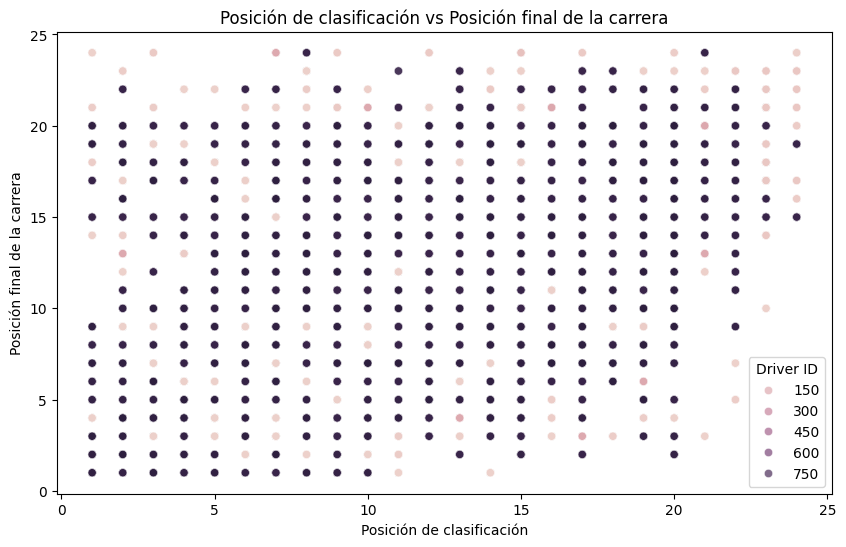

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='position', y='positionOrder', hue='driverId', alpha=0.7)
plt.title('Posición de clasificación vs Posición final de la carrera')
plt.xlabel('Posición de clasificación')
plt.ylabel('Posición final de la carrera')
plt.legend(title='Driver ID')
plt.show()
# Cada punto representa una carrera de un piloto


# Análisis de Datos de Fórmula 1: Conclusiones Principales

## Resumen Ejecutivo

### Exploración de Datos

1. **Datasets Analizados**
   - 14 conjuntos de datos diferentes de Fórmula 1
   - Periodo de cobertura: 1950-2024
   - Información incluye: rendimiento de constructores, resultados de carreras, tiempos de vuelta, paradas en boxes, etc.

### Visualizaciones Clave

#### 1. Número de Carreras por Temporada
- Evolución histórica del calendario de F1
- Visualización de la expansión del campeonato mundial

#### 2. Distribución de Puntos de Constructores
- Análisis de la distribución de rendimiento
- Identificación de constructores con mayor consistencia

#### 3. Top 10 Constructores por Victorias
- Ranking de los constructores más exitosos
- Comparación de rendimiento histórico

#### 4. Tiempos de Vuelta
- Análisis de la progresión de tiempos por piloto
- Identificación de patrones de rendimiento en carreras específicas

#### 5. Posiciones de Clasificación vs Posición Final
- Correlación entre posición de salida y resultado de carrera
- Evaluación de la capacidad de los pilotos para mejorar posiciones

### Análisis Estadísticos Principales

1. **Tiempos de Vuelta**
   - Cálculo de tiempos medios por piloto y carrera
   - Identificación de variabilidad de rendimiento

2. **Puntuaciones**
   - Agregación de puntos totales por piloto
   - Análisis de consistencia de rendimiento

## Conclusiones Generales

### Rendimiento
- Alta variabilidad en tiempos de vuelta y posiciones
- Importancia crítica de la clasificación para el resultado final
- Diferencias significativas entre constructores

### Estrategia
- Las paradas en boxes juegan un rol crucial
- La posición de salida influye, pero no determina completamente el resultado

### Limitaciones del Análisis
- Dataset limitado a 1950-2024
- Posibles sesgos por cambios en reglamentos y tecnología
